# yasa 기반으로 구한 hypnogram을 ground_truth와 비교하여 accuracy 계산

# For VD dataset

In [1]:
import os
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import get_acc_matrix

# 1. Without filtering

In [2]:
path_subejcts_g_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\ground_truth' 
subjects_g_hypno = os.listdir(path_subejcts_g_hpyno)
subjects_g_hypno.sort()
subjects_g_hypno = subjects_g_hypno[8:]
print(subjects_g_hypno)

path_subejcts_p_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\predicted_without_filt' 
subjects_p_hypno = os.listdir(path_subejcts_p_hpyno)
subjects_p_hypno.sort()
subjects_p_hypno = subjects_p_hypno[8:]
print(subjects_p_hypno)

['VD001.csv', 'VD002.csv', 'VD003.csv', 'VD004.csv', 'VD005.csv', 'VD006.csv', 'VD008.csv', 'VD011.csv', 'VD012.csv', 'VD017.csv', 'VD019.csv', 'VD022.csv', 'VD023.csv', 'VD025.csv', 'VD028.csv', 'VD029.csv', 'VD030.csv', 'VD031.csv', 'VD033.csv', 'VD034.csv', 'VD039.csv', 'VD041.csv', 'VD042.csv', 'VD043.csv', 'VD044.csv', 'VD045.csv', 'VD046.csv', 'VD047.csv', 'VD049.csv', 'VD050.csv', 'VD051.csv', 'VD052.csv', 'VD053.csv', 'VD054.csv', 'VD055.csv', 'VD056.csv', 'VD057.csv', 'VD058.csv']
['VD001', 'VD002', 'VD003', 'VD004', 'VD005', 'VD006', 'VD008', 'VD011', 'VD012', 'VD017', 'VD019', 'VD022', 'VD023', 'VD025', 'VD028', 'VD029', 'VD030', 'VD031', 'VD033', 'VD034', 'VD039', 'VD041', 'VD042', 'VD043', 'VD044', 'VD045', 'VD046', 'VD047', 'VD049', 'VD050', 'VD051', 'VD052', 'VD053', 'VD054', 'VD055', 'VD056', 'VD057', 'VD058']


In [3]:
dic_acc_total = {} # subect 별로 chan_comb에 따른 overall accuracy가 저장됨
dic_matrix_total = {} # subject 별로 6개의 matrix가 저장됨
key_total = [] # subject name이 key로써 저장됨
sub_num = 0

for subject in subjects_p_hypno:
    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno'))
    print(f"\n-- pridicted hypnograms: {csv_p_hypnos}")

    dic_acc_sub = {} # 한 명의 subject 내에서, 채널 조합 별 acc를 저장하는 dictionary
    dic_matrix_sub = {} # 한 명의 subject 내에서, 채널 조합 별 matrix를 저장하는 dictionary
    dic_acc_sub_key = ['IO_C3', 'IO_C4', 'no_eog_C3', 'no_eog_C4', 'SO_C3', 'SO_C4'] # dic_acc_sub에 접근하기 위한 key가 담긴 list
    ch_comb_num = 0

    for csv_p_hypno in csv_p_hypnos:
        path_p_hypno = os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno', csv_p_hypno)
        print(path_p_hypno)
        p_hypno = pd.read_csv(path_p_hypno).squeeze()

        # overall accuracy
        accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100 # 현재 channel combination에 대한 overall accuracy 계산
        dic_acc_sub[dic_acc_sub_key[ch_comb_num]] = accuracy # dictionary에 추가  

        # accuracy matrix
        matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
        dic_matrix_sub[dic_acc_sub_key[ch_comb_num]] = matrix 

        ch_comb_num += 1  

    key_total.append(subjects_p_hypno[sub_num])
    dic_acc_total[key_total[sub_num]] = dic_acc_sub
    dic_matrix_total[key_total[sub_num]] = dic_matrix_sub
    sub_num += 1

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD001.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD001\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD002.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', 

D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD017\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD017\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD017\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD017\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD019.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD019\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD019\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD019\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_witho

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD034.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD034\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD039.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', 

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD050.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_without_filt\VD050\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD051.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', 

In [4]:
df_no_filt = pd.DataFrame(dic_acc_total)
df_no_filt

,VD001,VD002,VD003,VD004,VD005,VD006,VD008,VD011,VD012,VD017,...,VD049,VD050,VD051,VD052,VD053,VD054,VD055,VD056,VD057,VD058
IO_C3,56.617647,70.954357,44.603381,44.764398,69.767442,60.268456,63.221884,66.971279,64.583333,62.731152,...,69.230769,55.769231,66.391185,84.615385,65.789474,53.757225,53.576865,75.034674,73.174603,75.832127
IO_C4,52.328431,68.188105,46.553966,44.240838,67.829457,61.476510,61.246201,65.274151,66.927083,62.588905,...,69.650350,54.807692,65.977961,84.867591,65.373961,54.913295,53.729072,73.925104,71.746032,76.700434
no_eog_C3,57.230392,73.997234,42.912874,44.109948,73.772610,68.322148,63.069909,66.971279,69.270833,64.438122,...,69.230769,55.608974,69.146006,84.110971,60.803324,55.635838,57.990868,72.538141,69.523810,78.002894
no_eog_C4,52.818627,73.997234,42.522757,44.109948,71.705426,70.201342,64.133739,65.013055,70.312500,63.726885,...,69.650350,56.410256,68.732782,84.237074,58.448753,56.791908,59.360731,70.873786,69.841270,79.160637
SO_C3,59.558824,69.294606,39.921977,45.418848,72.351421,60.402685,59.422492,65.274151,66.145833,62.162162,...,67.692308,54.326923,64.600551,86.254729,68.559557,53.901734,54.033486,72.122053,65.714286,75.687410
SO_C4,59.803922,67.496542,40.442133,45.157068,68.346253,63.355705,60.790274,63.315927,67.708333,61.450925,...,66.013986,54.166667,64.325069,86.128625,66.759003,54.768786,55.555556,71.983356,65.873016,76.700434


In [5]:
df_acc_no_filt = df_no_filt.loc['no_eog_C4']
df_acc_no_filt['mean'] = df_acc_no_filt.mean()
df_acc_no_filt = pd.DataFrame(df_acc_no_filt)
df_acc_no_filt = df_acc_no_filt.transpose()

pd.DataFrame(df_acc_no_filt['mean'])

,mean
no_eog_C4,66.092974


In [6]:
df_matrix_no_filt = pd.DataFrame(dic_matrix_total)
df_matrix_no_filt = df_matrix_no_filt.loc['no_eog_C3']
df_matrix_no_filt = df_matrix_no_filt.sum()
df_matrix_no_filt = df_matrix_no_filt/38
df_matrix_no_filt

,Wake,R,N1,N2,N3
Wake,64.828947,9.636842,5.110526,16.502632,1.655263
R,5.665789,83.373684,4.597368,5.507895,0.084211
N1,29.084211,9.339474,17.355263,39.565789,3.192105
N2,1.702632,2.615789,3.500000,69.236842,22.652632
N3,0.318421,0.000000,0.000000,6.242105,69.868421


# 2. With Filtering

In [7]:
path_subejcts_g_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\ground_truth' 
subjects_g_hypno = os.listdir(path_subejcts_g_hpyno)
subjects_g_hypno.sort()
subjects_g_hypno = subjects_g_hypno[8:]
print(subjects_g_hypno)

path_subejcts_p_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\predicted_with_filt' 
subjects_p_hypno = os.listdir(path_subejcts_p_hpyno)
subjects_p_hypno.sort()
subjects_p_hypno = subjects_p_hypno[8:]
print(subjects_p_hypno)

['VD001.csv', 'VD002.csv', 'VD003.csv', 'VD004.csv', 'VD005.csv', 'VD006.csv', 'VD008.csv', 'VD011.csv', 'VD012.csv', 'VD017.csv', 'VD019.csv', 'VD022.csv', 'VD023.csv', 'VD025.csv', 'VD028.csv', 'VD029.csv', 'VD030.csv', 'VD031.csv', 'VD033.csv', 'VD034.csv', 'VD039.csv', 'VD041.csv', 'VD042.csv', 'VD043.csv', 'VD044.csv', 'VD045.csv', 'VD046.csv', 'VD047.csv', 'VD049.csv', 'VD050.csv', 'VD051.csv', 'VD052.csv', 'VD053.csv', 'VD054.csv', 'VD055.csv', 'VD056.csv', 'VD057.csv', 'VD058.csv']
['VD001', 'VD002', 'VD003', 'VD004', 'VD005', 'VD006', 'VD008', 'VD011', 'VD012', 'VD017', 'VD019', 'VD022', 'VD023', 'VD025', 'VD028', 'VD029', 'VD030', 'VD031', 'VD033', 'VD034', 'VD039', 'VD041', 'VD042', 'VD043', 'VD044', 'VD045', 'VD046', 'VD047', 'VD049', 'VD050', 'VD051', 'VD052', 'VD053', 'VD054', 'VD055', 'VD056', 'VD057', 'VD058']


In [8]:
dic_acc_total = {} # subect 별로 chan_comb에 따른 overall accuracy가 저장됨
dic_matrix_total = {} # subject 별로 6개의 matrix가 저장됨
key_total = [] # subject name이 key로써 저장됨
sub_num = 0

for subject in subjects_p_hypno:
    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno'))
    print(f"\n-- pridicted hypnograms: {csv_p_hypnos}")

    dic_acc_sub = {} # 한 명의 subject 내에서, 채널 조합 별 acc를 저장하는 dictionary
    dic_matrix_sub = {} # 한 명의 subject 내에서, 채널 조합 별 matrix를 저장하는 dictionary
    dic_acc_sub_key = ['IO_C3', 'IO_C4', 'no_eog_C3', 'no_eog_C4', 'SO_C3', 'SO_C4'] # dic_acc_sub에 접근하기 위한 key가 담긴 list
    ch_comb_num = 0

    for csv_p_hypno in csv_p_hypnos:
        path_p_hypno = os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno', csv_p_hypno)
        print(path_p_hypno)
        p_hypno = pd.read_csv(path_p_hypno).squeeze()

        # overall accuracy
        accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100 # 현재 channel combination에 대한 overall accuracy 계산
        dic_acc_sub[dic_acc_sub_key[ch_comb_num]] = accuracy # dictionary에 추가  

        # accuracy matrix
        matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
        dic_matrix_sub[dic_acc_sub_key[ch_comb_num]] = matrix 

        ch_comb_num += 1  

    key_total.append(subjects_p_hypno[sub_num])
    dic_acc_total[key_total[sub_num]] = dic_acc_sub
    dic_matrix_total[key_total[sub_num]] = dic_matrix_sub
    sub_num += 1

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD001.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD001\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD002.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', 

D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD023\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD025.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD025\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD0

   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD043.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD043\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD044.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD055.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_IO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_IO_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_no_eog_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_no_eog_C4.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_SO_C3.csv
D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted_with_filt\VD055\pred_hypno\_SO_C4.csv
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD056.csv

-- pridicted hypnograms: ['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', 

In [9]:
df_filt = pd.DataFrame(dic_acc_total)

In [10]:
df_acc_filt = df_filt.loc['no_eog_C4']
df_acc_filt['mean'] = df_acc_filt.mean()
df_acc_filt = pd.DataFrame(df_acc_filt)
df_acc_filt = df_acc_filt.transpose()

pd.DataFrame(df_acc_filt['mean'])

,mean
no_eog_C4,66.091338


In [11]:
df_matrix_filt = pd.DataFrame(dic_matrix_total)
df_matrix_filt = df_matrix_filt.loc['no_eog_C3']
df_matrix_filt = df_matrix_filt.sum()
df_matrix_filt = df_matrix_filt/38
df_matrix_filt

,Wake,R,N1,N2,N3
Wake,64.947368,9.473684,5.286842,16.342105,1.676316
R,5.373684,83.563158,4.707895,5.518421,0.084211
N1,29.334211,9.000000,17.413158,39.576316,3.218421
N2,1.686842,2.652632,3.434211,69.255263,22.676316
N3,0.318421,0.000000,0.000000,6.347368,69.763158


In [14]:
df_acc_diff = df_acc_filt - df_acc_no_filt
pd.DataFrame(df_acc_diff['mean'])

,mean
no_eog_C4,-0.001636


In [15]:
df_matrix_diff = df_matrix_filt - df_matrix_no_filt
df_matrix_diff

,Wake,R,N1,N2,N3
Wake,0.118421,-0.163158,0.176316,-0.160526,0.021053
R,-0.292105,0.189474,0.110526,0.010526,0.000000
N1,0.250000,-0.339474,0.057895,0.010526,0.026316
N2,-0.015789,0.036842,-0.065789,0.018421,0.023684
N3,0.000000,0.000000,0.000000,0.105263,-0.105263


In [14]:
df_diff.loc[:, 'SUM'] = df_diff.sum(axis=1)
df_diff.loc[:, 'mean'] = df_diff.loc[:,'VD001':'VD058'].mean(axis=1)
df_diff

,VD001,VD002,VD003,VD004,VD005,VD006,VD008,VD011,VD012,VD017,...,VD051,VD052,VD053,VD054,VD055,VD056,VD057,VD058,SUM,mean
IO_C3,0.122549,0.276625,-0.390117,0.00000,-0.387597,-0.671141,-0.911854,0.522193,1.041667,0.142248,...,0.137741,0.252207,0.692521,-0.433526,-0.304414,-0.554785,0.31746,-0.578871,-7.016640,-0.092324
IO_C4,-0.245098,-2.213001,0.260078,0.39267,-0.904393,-0.134228,-0.455927,0.130548,0.520833,0.426743,...,0.137741,-0.126103,0.415512,-0.578035,0.456621,-0.277393,0.15873,0.144718,-8.768594,-0.115376
no_eog_C3,-0.122549,-0.138313,0.000000,-0.13089,-0.387597,-0.671141,-0.303951,0.391645,-0.390625,0.284495,...,-0.137741,-0.252207,0.554017,0.578035,0.152207,-0.554785,-0.31746,0.000000,-3.446044,-0.045343
no_eog_C4,0.122549,0.276625,0.260078,0.13089,-0.129199,0.402685,0.151976,0.391645,-0.651042,-0.284495,...,0.000000,0.000000,-0.415512,-0.433526,0.000000,0.277393,0.15873,-0.578871,0.124332,0.001636
SO_C3,-0.490196,0.138313,-0.260078,0.00000,0.258398,0.402685,0.000000,0.261097,0.130208,-0.284495,...,0.137741,-0.126103,0.277008,-0.722543,0.304414,0.000000,0.00000,0.434153,-4.022605,-0.052929
SO_C4,0.000000,-0.553250,0.130039,-0.26178,-0.129199,0.268456,0.303951,-0.130548,0.651042,0.000000,...,0.964187,-0.126103,0.138504,0.144509,-0.152207,0.277393,-0.31746,0.000000,4.254529,0.055981


# filtering 적용하기 이전 코드

## VD

In [29]:
dic_acc = {}
dic_matrix = {}
matrix_key = []
for sub_num in range(len(subjects_g_hypno)):

    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num]))
    print(f"\n-- pridicted hypnograms: {os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num])}\n{csv_p_hypnos}")

    temp_acc = []
    temp_matrix_key = []
    for csv_p_hypno in csv_p_hypnos:
        path_p_hypno = os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], csv_p_hypno)
        p_hypno = pd.read_csv(path_p_hypno).squeeze()

        accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100
        temp_acc.append(accuracy)
        matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
        dic_matrix[subjects_p_hypno[sub_num]+csv_p_hypno[0:-4]] = matrix
        #print('==================================')
        #print(matrix)
        temp_matrix_key.append(subjects_p_hypno[sub_num]+csv_p_hypno[0:-4])

    dic_acc[subjects_p_hypno[sub_num]] = temp_acc
    matrix_key.append(temp_matrix_key)

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD001.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD001
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD002.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD002
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD003.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD003
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD004.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validati

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD047.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD047
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD049.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD049
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD050.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validation\YASA\hypnograms\predicted\VD050
['_IO_C3.csv', '_IO_C4.csv', '_no_eog_C3.csv', '_no_eog_C4.csv', '_SO_C3.csv', '_SO_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD051.csv

-- pridicted hypnograms: D:\USC\code_mine\Model_validati

In [20]:
csv_names = [csv_p_hypnos[0][1:-4], csv_p_hypnos[1][1:-4], csv_p_hypnos[2][1:-4], csv_p_hypnos[3][1:-4], csv_p_hypnos[4][1:-4], csv_p_hypnos[5][1:-4]]
df_acc = pd.DataFrame(dic_acc, index=csv_names)
df_acc
#mean_acc = df_acc.mean(axis=1)
#mean_acc = pd.DataFrame(mean_acc, columns=['Mean accuracy'])
#mean_acc

,VD001,VD002,VD003,VD004,VD005,VD006,VD008,VD011,VD012,VD017,...,VD049,VD050,VD051,VD052,VD053,VD054,VD055,VD056,VD057,VD058
IO_C3,56.617647,70.954357,44.603381,44.764398,69.767442,60.268456,63.221884,66.971279,64.583333,62.731152,...,69.230769,55.769231,66.391185,84.615385,65.789474,53.757225,53.576865,75.034674,73.174603,75.832127
IO_C4,52.328431,68.188105,46.553966,44.240838,67.829457,61.476510,61.246201,65.274151,66.927083,62.588905,...,69.650350,54.807692,65.977961,84.867591,65.373961,54.913295,53.729072,73.925104,71.746032,76.700434
no_eog_C3,57.230392,73.997234,42.912874,44.109948,73.772610,68.322148,63.069909,66.971279,69.270833,64.438122,...,69.230769,55.608974,69.146006,84.110971,60.803324,55.635838,57.990868,72.538141,69.523810,78.002894
no_eog_C4,52.818627,73.997234,42.522757,44.109948,71.705426,70.201342,64.133739,65.013055,70.312500,63.726885,...,69.650350,56.410256,68.732782,84.237074,58.448753,56.791908,59.360731,70.873786,69.841270,79.160637
SO_C3,59.558824,69.294606,39.921977,45.418848,72.351421,60.402685,59.422492,65.274151,66.145833,62.162162,...,67.692308,54.326923,64.600551,86.254729,68.559557,53.901734,54.033486,72.122053,65.714286,75.687410
SO_C4,59.803922,67.496542,40.442133,45.157068,68.346253,63.355705,60.790274,63.315927,67.708333,61.450925,...,66.013986,54.166667,64.325069,86.128625,66.759003,54.768786,55.555556,71.983356,65.873016,76.700434


In [5]:
df_acc.describe()

,VD001,VD002,VD003,VD004,VD005,VD006,VD008,VD011,VD012,VD017,...,VD049,VD050,VD051,VD052,VD053,VD054,VD055,VD056,VD057,VD058
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,56.392974,70.654680,42.826181,44.633508,70.628768,64.004474,61.980750,65.469974,67.491319,62.849692,...,68.578089,55.181624,66.528926,85.035729,64.289012,54.961464,55.707763,72.746186,69.312169,77.013989
std,3.215754,2.840520,2.500900,0.567526,2.357896,4.261120,1.781209,1.373552,2.086044,1.077394,...,1.449876,0.887460,2.029987,0.935775,3.847741,1.132958,2.442911,1.493160,3.031150,1.337107
min,52.328431,67.496542,39.921977,44.109948,67.829457,60.268456,59.422492,63.315927,64.583333,61.450925,...,66.013986,54.166667,64.325069,84.110971,58.448753,53.757225,53.576865,70.873786,65.714286,75.687410
25%,53.768382,68.464730,40.962289,44.142670,68.701550,60.671141,60.904255,65.078329,66.341146,62.268848,...,68.076923,54.447115,64.944904,84.331652,61.945983,54.118497,53.805175,72.018031,66.785714,76.049204
50%,56.924020,70.124481,42.717815,44.502618,70.736434,62.416107,62.158055,65.274151,67.317708,62.660028,...,69.230769,55.208333,66.184573,84.741488,65.581717,54.841040,54.794521,72.330097,69.682540,76.700434
75%,58.976716,73.236515,44.180754,45.058901,72.189922,67.080537,63.183891,66.546997,68.880208,63.477952,...,69.545455,55.729167,68.147383,85.813367,66.516620,55.455202,57.382040,73.578363,71.269841,77.677279
max,59.803922,73.997234,46.553966,45.418848,73.772610,70.201342,64.133739,66.971279,70.312500,64.438122,...,69.650350,56.410256,69.146006,86.254729,68.559557,56.791908,59.360731,75.034674,73.174603,79.160637


In [6]:
df_acc.transpose().describe()

,IO_C3,IO_C4,no_eog_C3,no_eog_C4,SO_C3,SO_C4
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,66.326059,65.540526,66.953260,66.092974,65.246422,64.878236
std,9.313773,9.110255,9.055497,9.141219,9.426626,9.042041
min,44.603381,44.240838,42.912874,42.522757,39.921977,40.442133
25%,60.884130,60.922237,62.427783,61.859359,59.579718,59.859327
50%,66.666667,65.993621,68.820652,65.914936,65.930060,65.562935
75%,73.634121,71.222111,73.788812,71.497516,72.294079,71.404935
max,84.615385,84.867591,84.110971,84.237074,86.254729,86.128625


In [48]:
df_acc.transpose().head()

,IO_C3,IO_C4,no_eog_C3,no_eog_C4,SO_C3,SO_C4
VD001,56.617647,52.328431,57.230392,52.818627,59.558824,59.803922
VD002,70.954357,68.188105,73.997234,73.997234,69.294606,67.496542
VD003,44.603381,46.553966,42.912874,42.522757,39.921977,40.442133
VD004,44.764398,44.240838,44.109948,44.109948,45.418848,45.157068
VD005,69.767442,67.829457,73.772610,71.705426,72.351421,68.346253


In [72]:
df_acc_t = df_acc.transpose()
df_acc_t['no_eog_C4'][df_acc_t.loc[:, 'no_eog_C4']> 70].info()

<class 'pandas.core.series.Series'>
Index: 14 entries, VD002 to VD058
Series name: no_eog_C4
Non-Null Count  Dtype  
--------------  -----  
14 non-null     float64
dtypes: float64(1)
memory usage: 224.0+ bytes


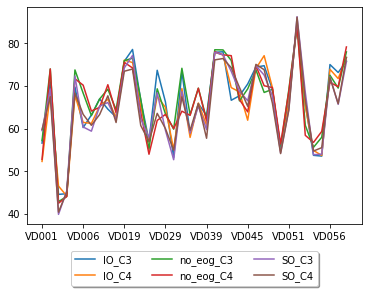

In [8]:
df_acc.transpose().iloc[:,:].plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

In [9]:
print(matrix_key[0])

['VD001_IO_C3', 'VD001_IO_C4', 'VD001_no_eog_C3', 'VD001_no_eog_C4', 'VD001_SO_C3', 'VD001_SO_C4']


In [10]:
IO_C3_acc_df = dic_matrix[matrix_key[0][0]].mul(0)
IO_C4_acc_df = dic_matrix[matrix_key[0][0]].mul(0)
no_eog_C3_acc_df = dic_matrix[matrix_key[0][0]].mul(0)
no_eog_C4_acc_df = dic_matrix[matrix_key[0][0]].mul(0)
SO_C3_acc_df = dic_matrix[matrix_key[0][0]].mul(0)
SO_C4_acc_df = dic_matrix[matrix_key[0][0]].mul(0)

for sub_num in range(len(subjects_g_hypno)):
    IO_C3_acc_df += dic_matrix[matrix_key[sub_num][0]]
    IO_C4_acc_df += dic_matrix[matrix_key[sub_num][1]]
    no_eog_C3_acc_df += dic_matrix[matrix_key[sub_num][2]]
    no_eog_C4_acc_df += dic_matrix[matrix_key[sub_num][3]]
    SO_C3_acc_df += dic_matrix[matrix_key[sub_num][4]]
    SO_C4_acc_df += dic_matrix[matrix_key[sub_num][5]]

IO_C3_acc_df = IO_C3_acc_df/len(subjects_g_hypno)
IO_C4_acc_df = IO_C4_acc_df/len(subjects_g_hypno)
no_eog_C3_acc_df = no_eog_C3_acc_df/len(subjects_g_hypno)
no_eog_C4_acc_df = no_eog_C4_acc_df/len(subjects_g_hypno)
SO_C3_acc_df = SO_C3_acc_df/len(subjects_g_hypno)
SO_C4_acc_df = SO_C4_acc_df/len(subjects_g_hypno)

print()

In [11]:
def acc_diagonal(matrix):
    W = matrix.iloc[0,0]
    R = matrix.iloc[1,1]
    N1 = matrix.iloc[2,2]
    N2 = matrix.iloc[3,3]
    N3 = matrix.iloc[4,4]
    
    diagonal_list = [W, R, N1, N2, N3]
    #diagonal_df = pd.DataFrame(diagonal_list, index=['Wake', 'R', 'N1', 'N2', 'N3'], columns=[name])
    #diagonal_df = diagonal_df.transpose()
    return diagonal_list

In [31]:
summary_dic = {
    'IO_C3': acc_diagonal(IO_C3_acc_df),
    'IO_C4': acc_diagonal(IO_C4_acc_df),
    'no_eog_C3': acc_diagonal(no_eog_C3_acc_df),
    'no_eog_C4': acc_diagonal(no_eog_C4_acc_df),
    'SO_C3': acc_diagonal(SO_C3_acc_df),
    'SO_C4': acc_diagonal(SO_C4_acc_df)
}

summary_df = pd.DataFrame(summary_dic, index=['Wake', 'R', 'N1', 'N2', 'N3'])
summary_df = summary_df.transpose()
summary_df['mean'] = summary_df.mean(axis=1)
summary_df.loc['mean'] = summary_df.mean(axis=0)
summary_df

,Wake,R,N1,N2,N3,mean
IO_C3,65.463158,72.815789,22.228947,71.223684,68.297368,60.005789
IO_C4,65.113158,73.568421,22.278947,69.513158,68.044737,59.703684
no_eog_C3,64.828947,83.373684,17.355263,69.236842,69.868421,60.932632
no_eog_C4,64.771053,83.365789,18.263158,67.460526,71.442105,61.060526
SO_C3,66.105263,78.178947,17.839474,68.092105,69.534211,59.950000
SO_C4,66.305263,78.313158,18.273684,67.002632,69.936842,59.966316
mean,65.431140,78.269298,19.373246,68.754825,69.520614,60.269825


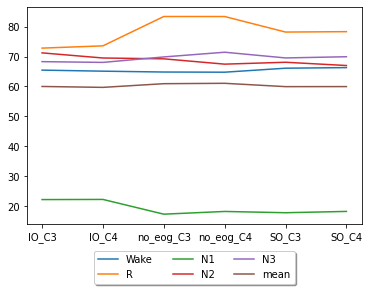

In [39]:
summary_df.loc['IO_C3':'SO_C4'].plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

In [13]:
# mean accuracy matrix of IO_C3
IO_C3_acc_df

,Wake,R,N1,N2,N3
Wake,65.463158,6.081579,7.957895,16.692105,1.536842
R,7.742105,72.815789,11.389474,7.221053,0.081579
N1,31.097368,4.792105,22.228947,38.150000,2.260526
N2,2.102632,1.313158,5.186842,71.223684,19.892105
N3,0.039474,0.000000,0.000000,8.107895,68.297368


In [14]:
IO_C4_acc_df

,Wake,R,N1,N2,N3
Wake,65.113158,6.102632,8.184211,16.681579,1.626316
R,6.973684,73.568421,11.531579,7.034211,0.126316
N1,31.036842,3.850000,22.278947,38.863158,2.484211
N2,2.313158,1.250000,5.178947,69.513158,21.450000
N3,0.657895,0.786842,0.000000,6.936842,68.044737


In [15]:
no_eog_C3_acc_df

,Wake,R,N1,N2,N3
Wake,64.828947,9.636842,5.110526,16.502632,1.655263
R,5.665789,83.373684,4.597368,5.507895,0.084211
N1,29.084211,9.339474,17.355263,39.565789,3.192105
N2,1.702632,2.615789,3.500000,69.236842,22.652632
N3,0.318421,0.000000,0.000000,6.242105,69.868421


In [16]:
no_eog_C4_acc_df

,Wake,R,N1,N2,N3
Wake,64.771053,9.273684,5.794737,16.126316,1.750000
R,5.292105,83.365789,4.678947,5.807895,0.100000
N1,28.684211,8.578947,18.263158,39.436842,3.589474
N2,2.689474,2.278947,3.481579,67.460526,23.776316
N3,1.371053,0.000000,0.000000,3.615789,71.442105


In [17]:
SO_C3_acc_df

,Wake,R,N1,N2,N3
Wake,66.105263,7.192105,5.478947,17.289474,1.663158
R,7.313158,78.178947,6.457895,7.205263,0.092105
N1,32.478947,6.392105,17.839474,38.289474,3.534211
N2,2.300000,1.765789,3.450000,68.092105,24.089474
N3,0.886842,0.078947,0.000000,5.931579,69.534211


In [18]:
SO_C4_acc_df

,Wake,R,N1,N2,N3
Wake,66.305263,7.078947,6.073684,16.465789,1.800000
R,6.760526,78.313158,6.386842,7.657895,0.118421
N1,32.797368,5.676316,18.273684,38.681579,3.092105
N2,2.610526,1.628947,3.376316,67.002632,25.102632
N3,1.034211,0.131579,0.000000,5.323684,69.936842


<AxesSubplot:xlabel='Time [hrs]', ylabel='Stage'>

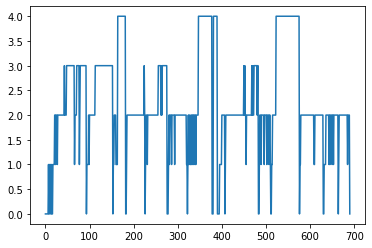

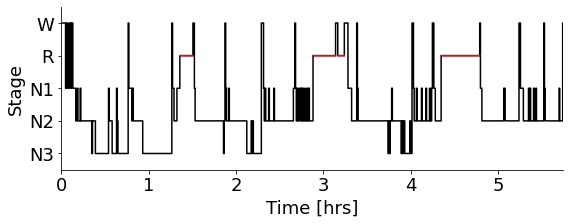

In [19]:
import math
def NaN_test(stage):
    if math.isnan(stage):
        return -1 
    return stage

(g_hypno.apply(NaN_test) == -1).sum()
# sub_num=4의 ground truth에는 NaN 값이 없음
(g_hypno == 3).sum()
g_hypno.plot()
yasa.plot_hypnogram(g_hypno)